<a href="https://colab.research.google.com/github/CharlesPrado23/Pos_Clustering_Modulo-I/blob/main/K_means_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from tkinter import Tk
from tkinter.filedialog import askopenfilename

In [ ]:
#For random centroid Initialization
def initKCentroids(X,K):
    randidx = np.random.permutation(X.shape[0]) #mx1 # 0 1 2 3 4 5 => 3 2 4 5 1 0
    return X[randidx[0:K],:] #X[3,:] and X[2,:] returned for K = 2

In [ ]:
#Returning the centroid number/index closest to the respective
#training example Xi
def findClosestCentroids(X,centroids):  # X = (m,n) , centroids = (K,n)
    K = centroids.shape[0] #We get number of clusters
    idx = np.zeros((X.shape[0],1))


    for i in range(X.shape[0]):
        for j in range(K):
            if j == 0:
                difference = X[i,:] - centroids[j,:]
                dif = np.sum(difference**2)
                idx[i] = j
            else:
                difference = X[i,:] - centroids[j,:]
                if np.sum(difference**2) < dif:
                    dif = np.sum(difference**2)
                    idx[i] = j

    return idx

In [ ]:
#After alloting the centroids to Xi
#this computes the new centroid and updates the same
def computeCentroids(X,idx,K):
    m , n = X.shape
    centroids = np.zeros((K,n))
    occur = np.zeros((K,1))

    for i in range(m):
        index = int(np.squeeze(idx[i]))
        centroids[index,:] = centroids[index,:] + X[i,:] #Column wise addition
        occur[index] = occur[index] + 1

    return (np.divide(centroids,occur)) # Return K * n Matrix

In [ ]:
#Used to display points and centroids after the KMeans process is complete
def display(X,centroids,idx):
    K = centroids.shape[0]
    m = X.shape[0]

    fig , ax = fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(15,10))
    color = "rgbky"
    for i in range(K):
        index_i_centroid = (idx == i).reshape(m,1)
        ax.scatter(X[index_i_centroid[:,0],0],X[index_i_centroid[:,0],1],c = color[i%5],s=40)



#    plt.scatter(X[:,0],X[:,1])
    plt.scatter(centroids[:,0],centroids[:,1],c = "m",s = 120)
    plt.tight_layout()

In [ ]:
#Main KMeans Function that takes in initial Centroids
#and returns the final updated centroids after given iterations
#along with that, returns the index of each input feature
#belonging to a respective centroids
#KMeans for Image Compression
def KMeans_Image(X,initial_centroids,max_iters):

    m,n = X.shape
    K = initial_centroids.shape[0]
    print("K is : ",K)
    centroids = initial_centroids
    previous_centroids = centroids
    idx = np.zeros((m,1))

    for i in range(max_iters):

        idx = findClosestCentroids(X,centroids)
        centroids = computeCentroids(X,idx,K)


    return [centroids,idx]

In [ ]:
!apt-get install -y xvfb # Install X Virtual Frame Buffer
import os
os.system('Xvfb :1 -screen 0 1600x1200x16  &')    # create virtual display with size 1600x1200 and 16 bit color. Color can be changed to 24 or 8
os.environ['DISPLAY']=':1.0'    # tell X clients t

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common
The following NEW packages will be installed:
  libfontenc1 libxfont2 libxkbfile1 x11-xkb-utils xfonts-base xfonts-encodings xfonts-utils
  xserver-common xvfb
0 upgraded, 9 newly installed, 0 to remove and 49 not upgraded.
Need to get 7,815 kB of archives.
After this operation, 11.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 libfontenc1 amd64 1:1.1.4-1build3 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxfont2 amd64 1:2.0.5-1build1 [94.5 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxkbfile1 amd64 1:1.1.0-1build3 [71.8 kB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/main amd64 x11-xkb-utils amd64 7.7+5build4 [172 kB]
Get:5 http://archiv

(548, 1000, 3)


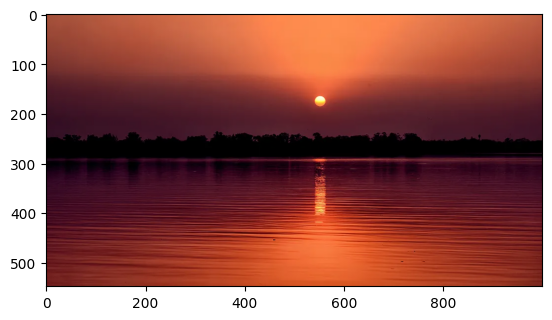

In [ ]:
isPNG = False
Tk().withdraw()
#filename = askopenfilename(title = "Choose a file")
filename = '/content/1_fK9saN-Cax3u6GYOMbe6jA.webp'
image = imread(filename)
name = filename.split(".")
if name[1] == "png":
    isPNG = True
print(image.shape)
plt.imshow(image)


In [ ]:
A = image.reshape(image.shape[0]*image.shape[1],image.shape[2])
print(A.shape)
A

(548000, 3)


array([[162,  79,  57],
       [162,  79,  57],
       [162,  79,  57],
       ...,
       [120,  37,  28],
       [120,  37,  28],
       [120,  37,  28]], dtype=uint8)

In [ ]:
if isPNG:
    A
else:
    A = A / 255

In [ ]:
print(A) #Normalized
K = 8
X = A
num_iters = 10
centroids , idx = KMeans_Image(X,initKCentroids(X,K),num_iters)

[[0.63529412 0.30980392 0.22352941]
 [0.63529412 0.30980392 0.22352941]
 [0.63529412 0.30980392 0.22352941]
 ...
 [0.47058824 0.14509804 0.10980392]
 [0.47058824 0.14509804 0.10980392]
 [0.47058824 0.14509804 0.10980392]]
K is :  8


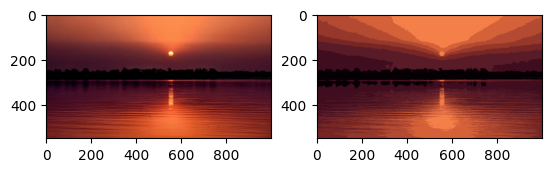

In [ ]:
X_recovered = X.copy()
for i in range(K):
    X_recovered[(np.squeeze((idx == i))),:] = centroids[i]

X_recovered = X_recovered.reshape(image.shape[0],image.shape[1],image.shape[2])
A = A.reshape(image.shape[0],image.shape[1],image.shape[2])

fig , axs = plt.subplots(1,2)

axs[0].imshow(A)
axs[1].imshow(X_recovered)
plt.imsave("kmeans_16.jpg",X_recovered)